# Extended Data Fig 1

## Setup

In [1]:
# Set working directory
%cd notebooks
# Autoreload
%load_ext autoreload
%autoreload 2
# Use rpy2 to run R in python notebook for plotting
%load_ext rpy2.ipython

/home/jovyan/work/notebooks


In [2]:
# Import local code
import sys
sys.path.append('/home/jovyan/work/code')
from gradientVersion import *
from processing import *
from analysis_helpers import *
from triplets import *
from enrichments_data import *
from enrichments import *
from single_cell import *
from brainspan import *
from maps_data import *
from maps_analysis import *
from maps_null_test import *
from disorders_data import *
from disorders import *

In [ ]:
%%R 
source("../code/fig_extended.R")

In [3]:
pca_base = gradientVersion(approach='pca', kernel=None).fit('hcp_base')
dme_3d_ds5 = gradientVersion(approach='dm', kernel='normalized_angle', alpha=1).fit('hcp_3d_ds5')

New gradients version: method=pca, kernel=None, sparsity=0, data=hcp_base
New gradients version: method=dm, kernel=normalized_angle, sparsity=0, data=hcp_3d_ds5


In [4]:
weights = dme_3d_ds5.weights.iloc[:,:3]
null_weights = shuffle_gene_weights(weights, n=5000, rank=False)

---

### Donor distribution

In [ ]:
# _, counts, stability = get_expression_abagen(fetch_hcp(), donors_threshold=3, return_counts=True, return_stability=True)

In [5]:
counts = pd.read_csv("../outputs/counts_hcp.csv", index_col=0)
donor_counts = (counts!=0).sum(axis=1)[:180].rename('count').to_frame().join(get_labels_hcp())
stability = pd.read_csv("../outputs/stability_hcp_ranked.csv", index_col=0).set_index('gene_symbol')


System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down



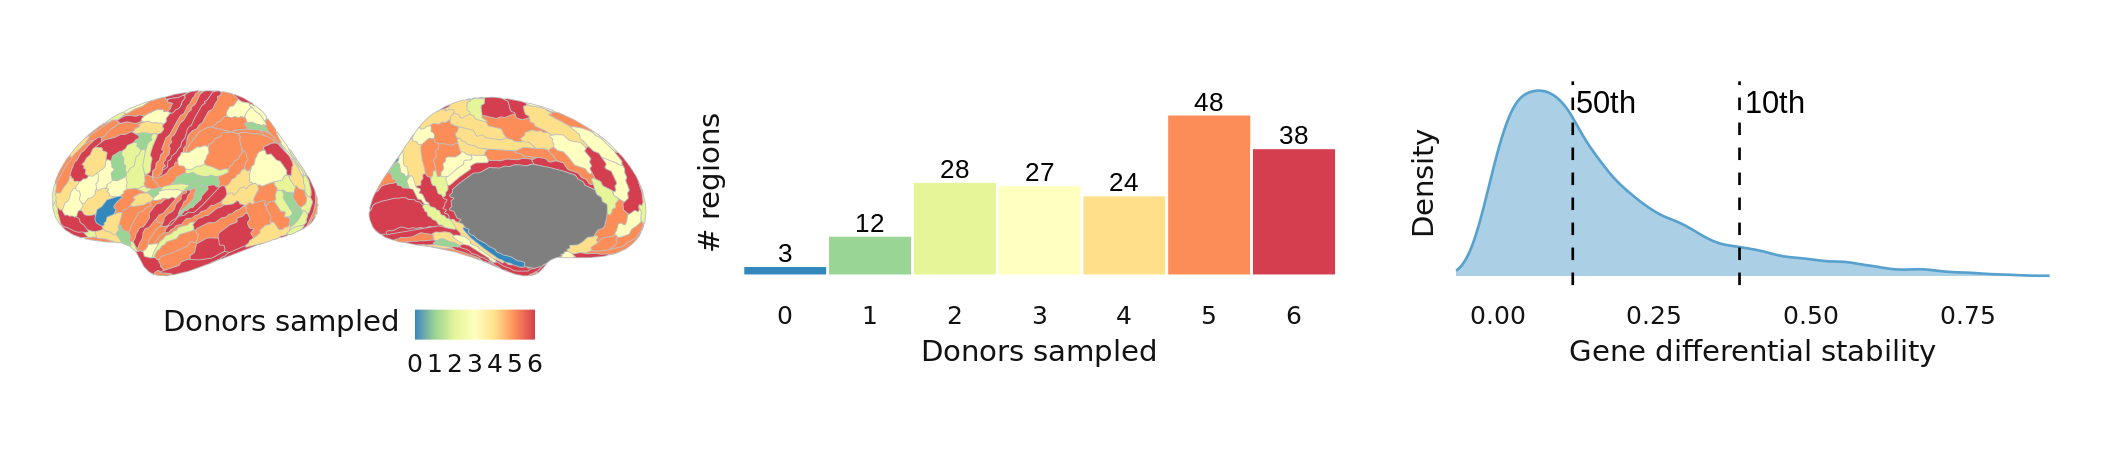

In [6]:
%%R -i donor_counts -i stability -w 180 -h 40 -u mm -r 300

g1 <- plot_donor_counts(donor_counts)
g2 <- plot_donor_counts_histogram(donor_counts) + plot_layout(tag_level='new')
g3 <- plot_gene_stability_density(stability)

plot_distributions <- (g1 | g2 | g3)
plot_distributions

### Raster plot of filtering options

Compute expression data for all triplets, or load from file

In [7]:
# triplets = get_triplets(atlas=fetch_hcp())
# save_pickle(triplets, "triplets")
triplets = load_pickle('triplets')
print("Got base triplets")

# triplets_2donors = get_triplets(atlas=fetch_hcp(), donors_threshold=2)
# save_pickle(triplets_2donors, "triplets_2donors")
triplets_2donors = load_pickle('triplets_2donors')
print("Got 2donors triplets")

# triplets_3donors = get_triplets(atlas=fetch_hcp(), donors_threshold=3)
# save_pickle(triplets_3donors, "triplets_3donors")
triplets_3donors = load_pickle('triplets_3donors')
print("Got 3donors triplets")

Got base triplets
Got 2donors triplets
Got 3donors triplets


Load triplets data from pickles since triplet stability levels are slow to compute

In [9]:
# triplets_pca = make_triplet_ds_plot(get_triplets_stability_levels(triplets, approach='pca', kernel=None))
# triplets_dme = make_triplet_ds_plot(get_triplets_stability_levels(triplets, approach='dm', kernel='normalized_angle', alpha=1))
# triplets_pca_2d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_2donors, approach='pca', kernel=None))
# triplets_dme_2d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_2donors, approach='dm', kernel='normalized_angle', alpha=1))
# triplets_pca_3d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_3donors, approach='pca', kernel=None))
# triplets_dme_3d = make_triplet_ds_plot(get_triplets_stability_levels(triplets_3donors, approach='dm', kernel='normalized_angle', alpha=1))

In [10]:
# triplets_dict = {
#     'PCA, all regions': triplets_pca, 
#     'PCA, only 2+ donor regions': triplets_pca_2d, 
#     'PCA, only 3+ donor regions': triplets_pca_3d,
#     'DME, all regions': triplets_dme,
#     'DME, only 2+ donor regions': triplets_dme_2d,
#     'DME, only 3+ donor regions': triplets_dme_3d
# }

# save_pickle(triplets_dict, 'triplets_dict')
triplets_dict = load_pickle('triplets_dict')

triplets_plot = (pd.concat(triplets_dict)
 .reset_index(0)
 .rename({'level_0':'method', 'version':'DS'}, axis=1)
 .assign(method = lambda x: pd.Categorical(x['method'], ordered=True, categories=triplets_dict.keys()))
                   )
triplets_plot

,method,how,DS,component,pair,corr,corr_abs
0,"PCA, all regions",Region scores,0.0,1,012-345,0.774335,0.774335
1,"PCA, all regions",Region scores,0.0,2,012-345,0.041373,0.041373
2,"PCA, all regions",Region scores,0.0,3,012-345,0.245817,0.245817
3,"PCA, all regions",Region scores,0.0,4,012-345,0.106467,0.106467
4,"PCA, all regions",Region scores,0.0,5,012-345,-0.107603,0.107603
...,...,...,...,...,...,...,...
495,"DME, only 3+ donor regions",Region scores,0.9,1,045-123,0.970999,0.970999
496,"DME, only 3+ donor regions",Region scores,0.9,2,045-123,0.950815,0.950815
497,"DME, only 3+ donor regions",Region scores,0.9,3,045-123,0.927292,0.927292
498,"DME, only 3+ donor regions",Region scores,0.9,4,045-123,0.853620,0.853620


In [11]:
pd.concat(triplets_dict).reset_index(0).groupby(['level_0','how','version','component'])['corr_abs'].median().unstack(2)

version                                                  0.0       0.1  \
level_0                    how           component                       
DME, all regions           Region scores 1          0.779779  0.797595   
                                         2          0.088498  0.130009   
                                         3          0.140212  0.120787   
                                         4          0.209637  0.335881   
                                         5          0.341785  0.362675   
DME, only 2+ donor regions Region scores 1          0.886773  0.892680   
                                         2          0.179735  0.236983   
                                         3          0.202728  0.261034   
                                         4          0.290805  0.364443   
                                         5          0.211409  0.179571   
DME, only 3+ donor regions Region scores 1          0.943289  0.945071   
                                         2          0.703216  0.689413   
                                         3          0.519905  0.548900   
                                         4          0.215122  0.273843   
                                         5          0.283837  0.288940   
PCA, all regions           Region scores 1          0.721299  0.748945   
                                         2          0.118019  0.110347   
                                         3          0.112725  0.125533   
                                         4          0.145198  0.139684   
                                         5          0.298827  0.336792   
PCA, only 2+ donor regions Region scores 1          0.879506  0.887581   
                                         2          0.154541  0.210887   
                                         3          0.182715  0.188370   
                                         4          0.231356  0.213835   
                                         5          0.243905  0.322267   
PCA, only 3+ donor regions Region scores 1          0.946573  0.947768   
                                         2          0.641467  0.638938   
                                         3          0.498338  0.534291   
                                         4          0.215585  0.192103   
                                         5          0.180987  0.209820   

version                                                  0.2       0.3  \
level_0                    how           component                       
DME, all regions           Region scores 1          0.820613  0.838806   
                                         2          0.177416  0.227978   
                                         3          0.143557  0.136625   
                                         4          0.459702  0.335695   
                                         5          0.307663  0.268851   
DME, only 2+ donor regions Region scores 1          0.899796  0.907334   
                                         2          0.313708  0.340456   
                                         3          0.372525  0.460689   
                                         4          0.315908  0.278868   
                                         5          0.115746  0.144201   
DME, only 3+ donor regions Region scores 1          0.947773  0.950859   
                                         2          0.718584  0.732016   
                                         3          0.566324  0.567890   
                                         4          0.187712  0.220080   
                                         5          0.277093  0.228726   
PCA, all regions           Region scores 1          0.778971  0.807344   
                                         2          0.159537  0.171453   
                                         3          0.117387  0.069135   
                                         4          0.202681  0.155136   
                                         5          0.404655  0.448716   
PCA

In [12]:
# triplets_pca_by_donors = pd.concat({
#     '1': triplets_pca,
#     '2': triplets_pca_2d,
#     '3': triplets_pca_3d,
# })
# triplets_dme_by_donors = pd.concat({
#     '1': triplets_dme,
#     '2': triplets_dme_2d,
#     '3': triplets_dme_3d,
# })

# triplets_raster = (pd.concat({
#     'pca': triplets_pca_by_donors, 
#     'dme': triplets_dme_by_donors
# }).reset_index([0,1])
# .rename({
#     'level_0':'method', 
#     'level_1':'donors_filter',
#     'version':'gene_filter'
# }, axis=1)
# .groupby(['component', 'method', 'donors_filter', 'gene_filter'])
# .median()
# .reset_index()
# )

# save_pickle(triplets_raster, 'triplets_raster')
triplets_raster = load_pickle('triplets_raster')
triplets_raster

,component,method,donors_filter,gene_filter,corr,corr_abs
0,1,dme,1,0.0,0.765311,0.779779
1,1,dme,1,0.1,0.782268,0.797595
2,1,dme,1,0.2,0.804586,0.820613
3,1,dme,1,0.3,0.825892,0.838806
4,1,dme,1,0.4,0.845048,0.853103
...,...,...,...,...,...,...
295,5,pca,3,0.5,-0.015480,0.262433
296,5,pca,3,0.6,-0.053473,0.236582
297,5,pca,3,0.7,0.133661,0.133661
298,5,pca,3,0.8,0.092722,0.193578


Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


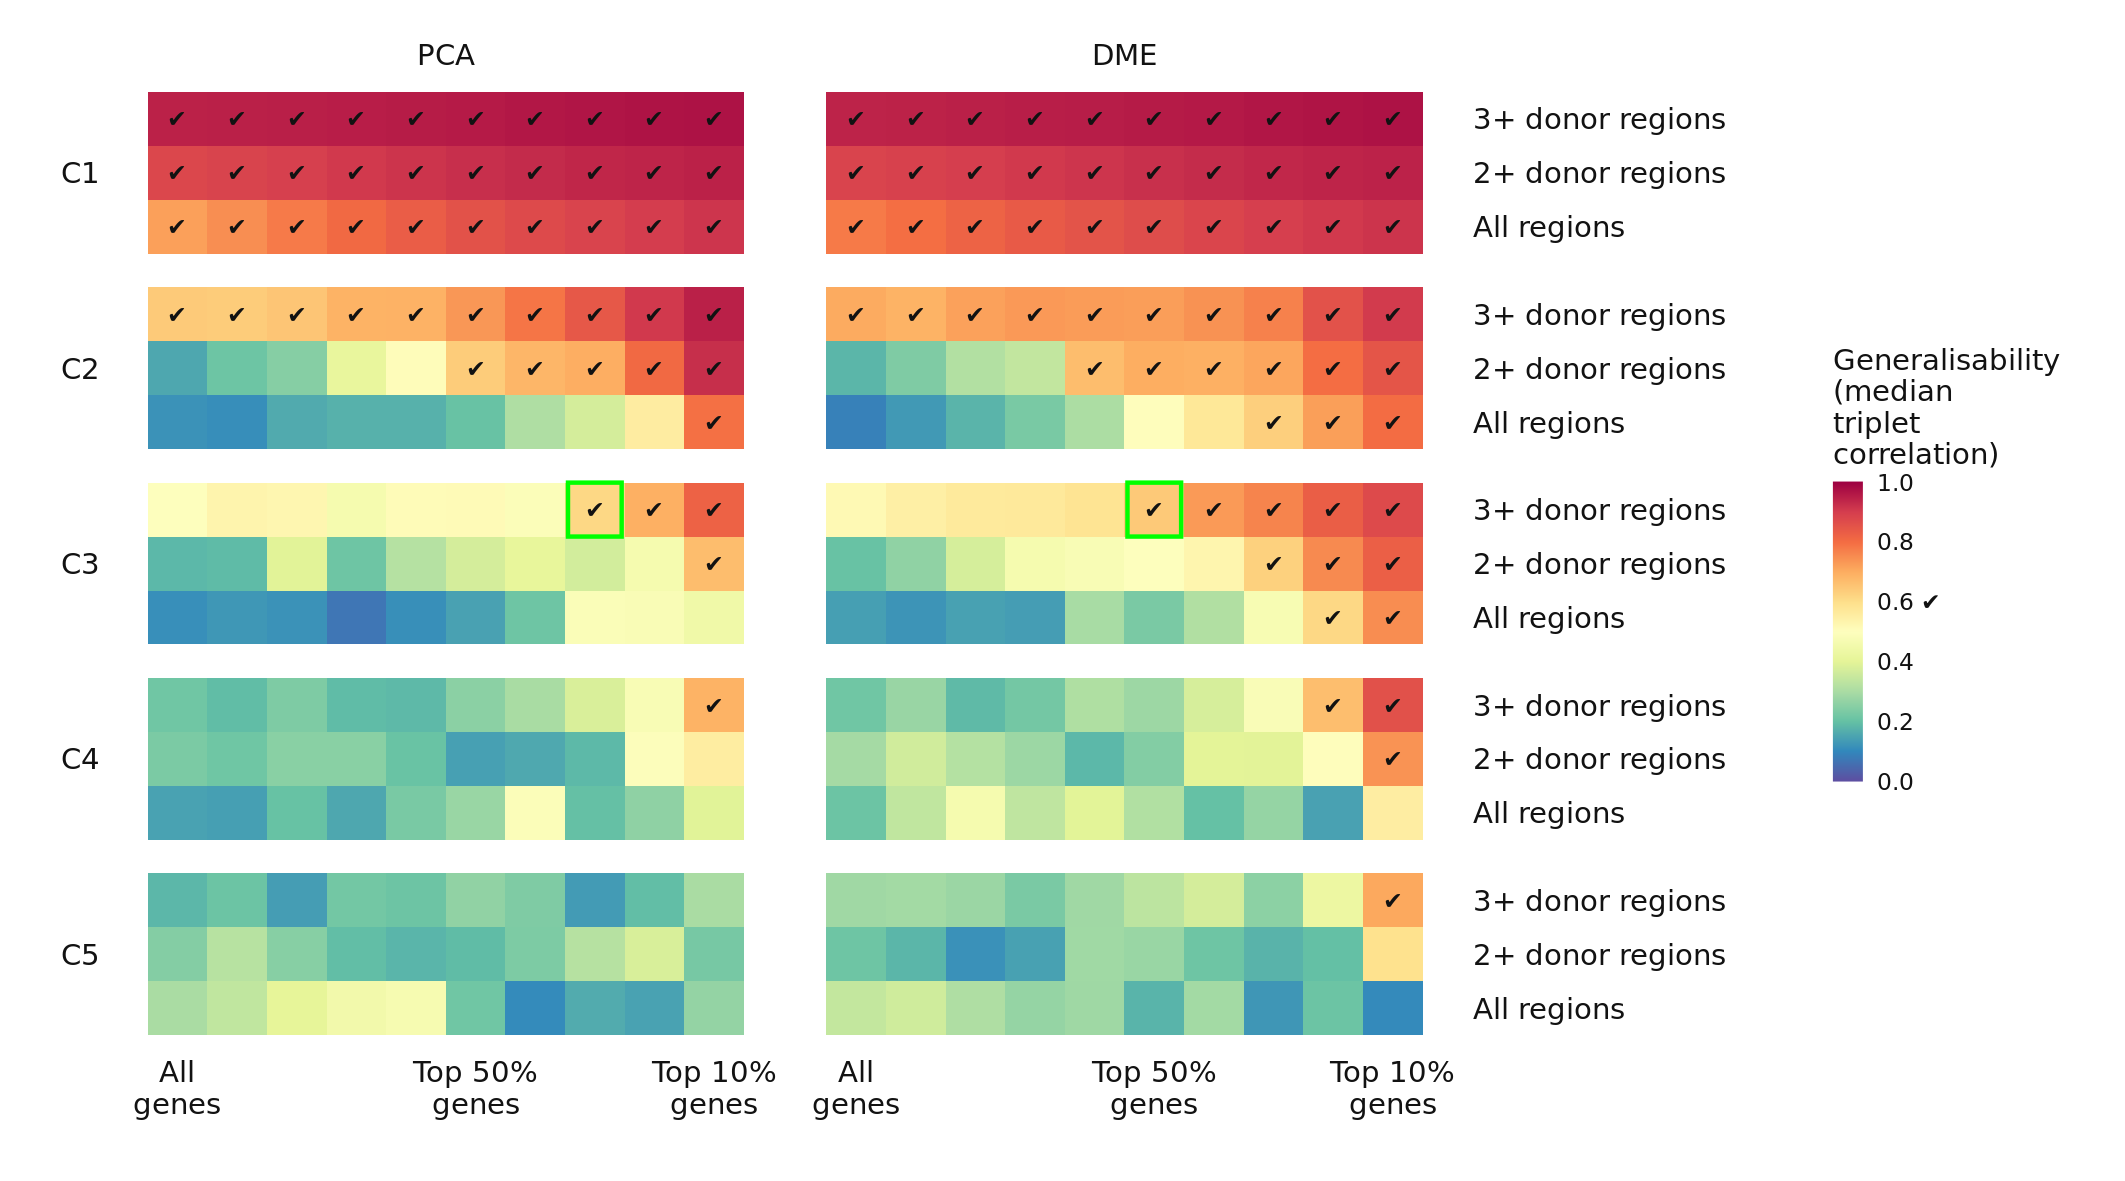

In [13]:
%%R -w 180 -h 100 -u mm -r 300 -i triplets_raster
source("../code/fig_extended.R")
triplets_raster = plot_triplets_raster(triplets_raster, n_components=5)
triplets_raster

### Version scatter plots

In [ ]:
# get_expression_abagen(fetch_hcp(), donors_threshold=3, gene_stability_threshold=0.7, save_name='hcp_3d_ds7')

INFO: Donor-specific atlases provided; using native coords for tissue samples
INFO: Reannotating probes with information from Arnatkevic̆iūtė et al., 2019, NeuroImage
INFO: Filtering probes with intensity-based threshold of 0.5
INFO: 32669 probes survive intensity-based filtering
INFO: Reducing probes indexing same gene with method: diff_stability
INFO: 15946 genes remain after probe filtering + selection
INFO: 458 / 477 samples matched to regions for donor #9861
INFO: 346 / 367 samples matched to regions for donor #10021
INFO: 173 / 181 samples matched to regions for donor #12876
INFO: 259 / 263 samples matched to regions for donor #14380
INFO: 222 / 224 samples matched to regions for donor #15496
INFO: 231 / 240 samples matched to regions for donor #15697
INFO: Aggregating samples to regions with provided region_agg: donors


137 / 180 regions remain after filtering for regions with samples from >= 3 donors
4784 / 15946 genes remain after filtering for top 0.3 stability
Expression matrix saved to ../data/abagen-data/expression/hcp_3d_ds7.csv


gene_symbol,A1BG,AAAS,AAED1,AAK1,AARD,AARS,ABCA1,ABCA5,ABCA6,ABCA9,...,ZSCAN29,ZSCAN31,ZSCAN5A,ZSCAN9,ZSWIM4,ZSWIM9,ZWINT,ZYX,ZZEF1,ZZZ3
label,,,,,,,,,,,,,,,,,,,,,
1,0.234124,0.686152,0.279157,0.670004,0.694569,0.500742,0.455827,0.847949,0.806617,0.819410,...,0.627291,0.784252,0.220417,0.817429,0.793574,0.183059,0.387873,0.839740,0.825577,0.346719
4,0.363618,0.681523,0.376047,0.713097,0.611765,0.558431,0.451900,0.728520,0.759100,0.654380,...,0.640444,0.756393,0.321787,0.762999,0.703900,0.207638,0.432438,0.810666,0.738654,0.357823
5,0.219162,0.648171,0.253024,0.693113,0.590371,0.509893,0.390014,0.783309,0.747686,0.812496,...,0.713580,0.685411,0.184382,0.672967,0.815209,0.366467,0.331184,0.784044,0.761205,0.309604
6,0.418642,0.633253,0.344356,0.626012,0.669849,0.472977,0.479307,0.651651,0.725277,0.644479,...,0.544879,0.608851,0.326790,0.637188,0.590776,0.469356,0.476248,0.684917,0.768377,0.443219
8,0.312791,0.619065,0.434047,0.630902,0.546099,0.648789,0.467131,0.474087,0.610623,0.575041,...,0.503053,0.422620,0.658484,0.494481,0.566637,0.380324,0.405083,0.716991,0.631567,0.326405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.490537,0.409748,0.423437,0.589994,0.586216,0.627218,0.377613,0.613840,0.426601,0.628341,...,0.447971,0.583386,0.511735,0.505436,0.536468,0.571593,0.502891,0.541865,0.565517,0.382571
176,0.690689,0.441887,0.515177,0.424057,0.490759,0.426175,0.584841,0.391758,0.477317,0.368153,...,0.454877,0.451370,0.542929,0.375665,0.410888,0.664362,0.554143,0.337370,0.439675,0.572576
177,0.691370,0.493273,0.504368,0.344129,0.450580,0.601366,0.534432,0.307827,0.346702,0.337571,...,0.462090,0.526276,0.583738,0.340832,0.497315,0.546639,0.561580,0.472524,0.369499,0.538924


In [16]:
# pca_3d_ds5 = gradientVersion(approach='pca').fit('hcp_3d_ds5')
pca_3d_ds7 = gradientVersion(approach='pca').fit('hcp_3d_ds7')

New gradients version: method=pca, kernel=None, sparsity=0, data=hcp_3d_ds7


In [17]:
versions_scores = pd.concat({
#    'PCA, all genes,\nall regions' : pca_base.clean_scores(),
   'PCA, top 30% genes,\n3+ donor regions' : pca_3d_ds7.clean_scores(),
   'dme_3d_ds5' : dme_3d_ds5.clean_scores(),
}).reset_index(level=0).rename({'level_0':'version'},axis=1)

scores_melt = (versions_scores
               .set_index(['version', 'label'])
               .melt(ignore_index=False, var_name='C', value_name='score')
               .reset_index('version')
)
df_versions_scatter = (scores_melt.join(scores_melt, lsuffix='_x', rsuffix='_y')
    .loc[lambda x: 
            (x['version_x'].str.contains('PCA, all')) & (x['version_y'].str.contains('dme_3d_ds5')) |
            (x['version_x'].str.contains('PCA, top')) & (x['version_y'].str.contains('dme_3d_ds5'))
    ]
)
df_versions_scatter.head()

,version_x,C_x,score_x,version_y,C_y,score_y
label,,,,,,
1,"PCA, top 30% genes,\n3+ donor regions",C1,1.512174,dme_3d_ds5,C1,1.459678
1,"PCA, top 30% genes,\n3+ donor regions",C1,1.512174,dme_3d_ds5,C2,0.540315
1,"PCA, top 30% genes,\n3+ donor regions",C1,1.512174,dme_3d_ds5,C3,-0.947251
1,"PCA, top 30% genes,\n3+ donor regions",C2,0.654577,dme_3d_ds5,C1,1.459678
1,"PCA, top 30% genes,\n3+ donor regions",C2,0.654577,dme_3d_ds5,C2,0.540315


`summarise()` has grouped output by 'version_x', 'C_x'. You can override using
the `.groups` argument.
`geom_smooth()` using formula = 'y ~ x'


/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '


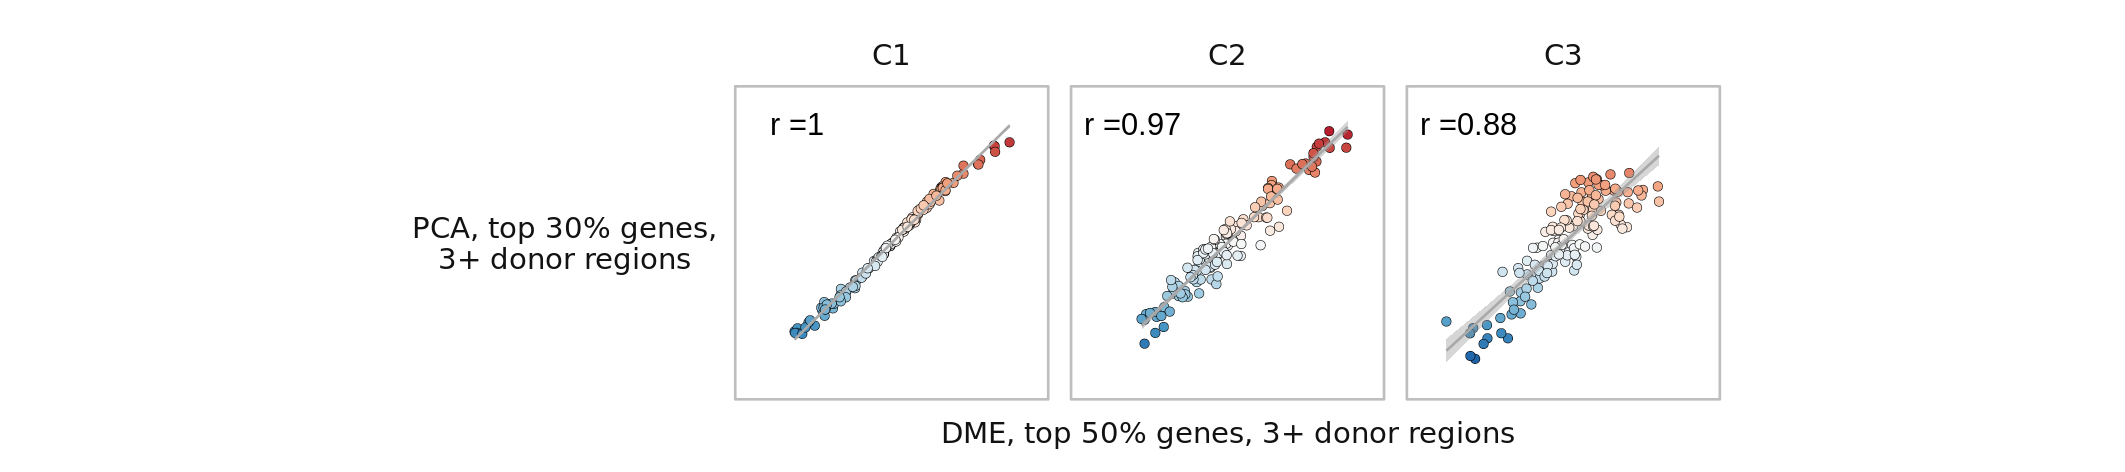

In [18]:
%%R -w 180 -h 40 -u mm -r 300 -i df_versions_scatter
source("../code/fig_extended.R")
# all <- df_versions_scatter %>% filter(version_x %>% str_detect('all')) %>% plot_versions_scatter()
# filter <- df_versions_scatter %>% filter(version_x %>% str_detect('top')) %>% plot_versions_scatter()
# versions_scatter <- all | filter
# versions_scatter
scatter <- df_versions_scatter %>% plot_versions_scatter()
scatter

## Fig

`geom_smooth()` using formula = 'y ~ x'


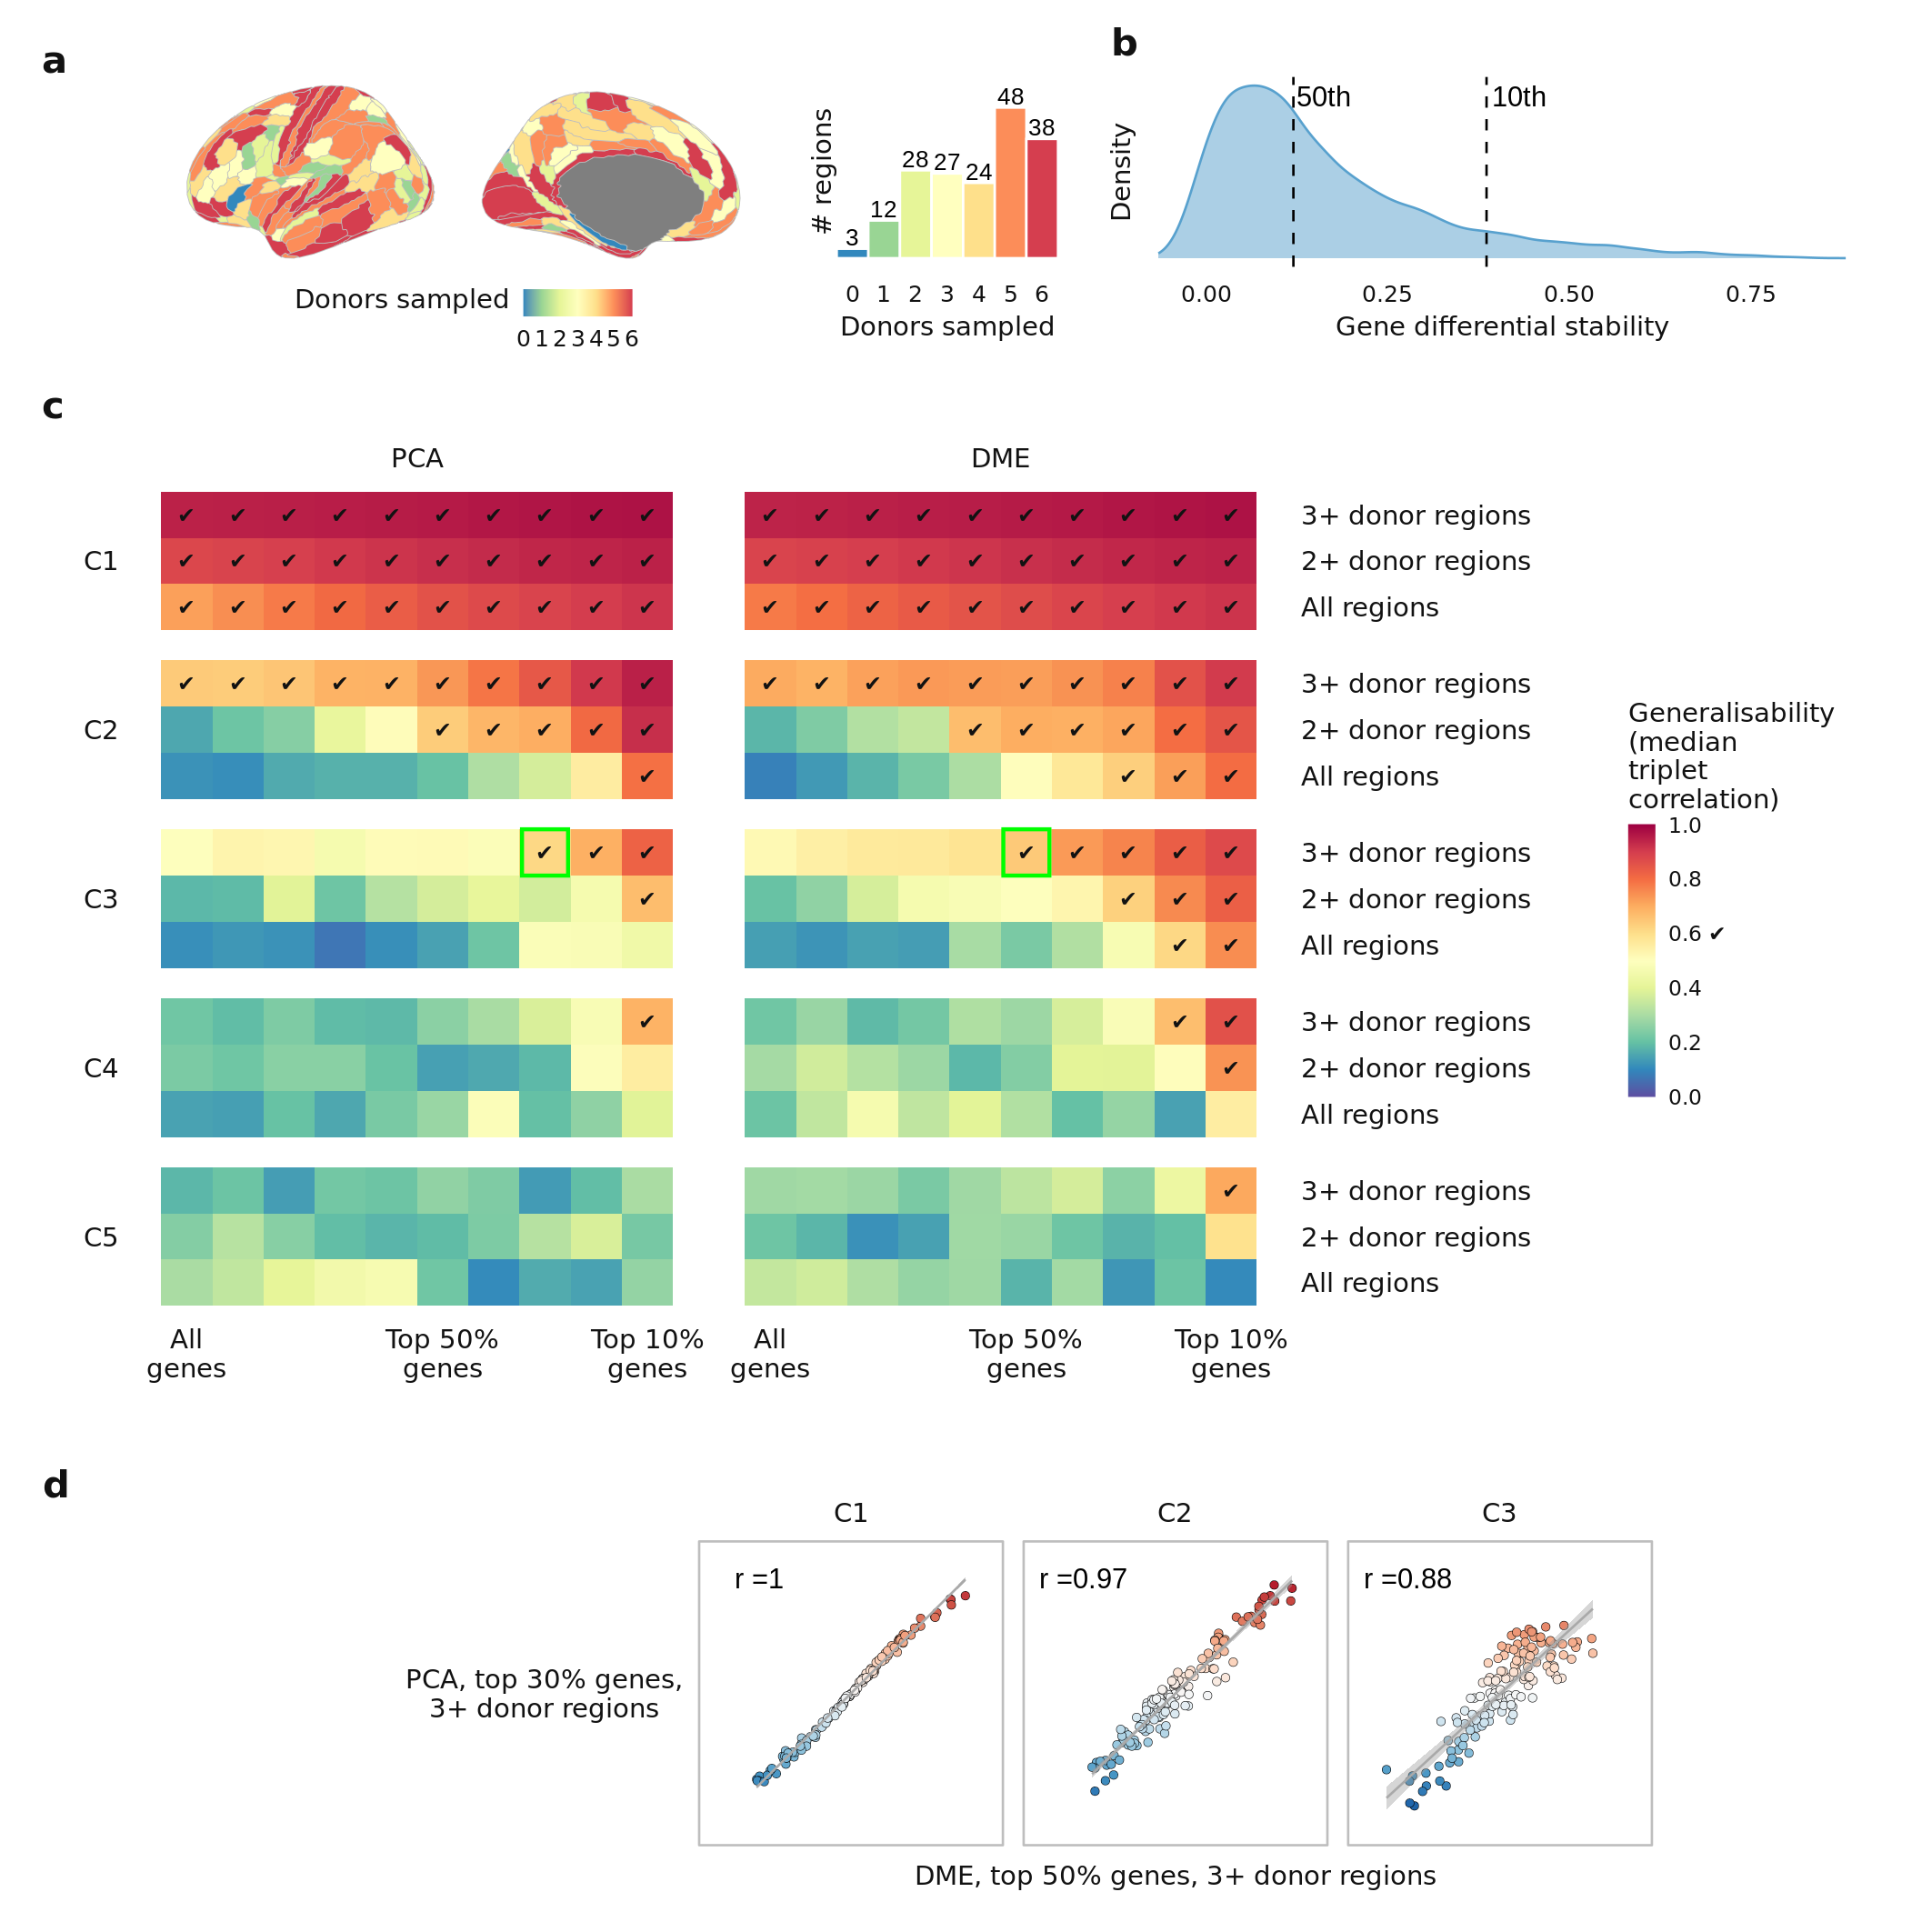

In [21]:
%%R -w 180 -h 180 -u mm -r 300
source("../code/fig_extended.R")

scatter <- scatter + theme(plot.tag = element_text(margin=margin(0,0,0,-11,'mm')))

design <- c(
    area(t=1,b=25,l=1,r=80),
    area(t=1,b=25,l=81,r=140),
    area(t=1,b=25,l=141,r=180),
    area(t=26,b=140,l=1,r=179),
    area(t=141,b=180,l=2,r=180)
)

plot <- plot_distributions + triplets_raster + scatter + plot_layout(design=design)
annotated <- plot + plot_annotation(tag_level='a')
annotated

In [22]:
%%R
ggsave(file="../outputs/figures/fig_ext_1.svg", plot=annotated, width=180, height=180, units='mm')

`geom_smooth()` using formula = 'y ~ x'
